In [1]:
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import pandas as pd 
import matplotlib.pyplot as plt

9834 samples of category "Grocery" in groceries.csv file


In [2]:
online_retail_df = pd.read_csv("datasets/ARCHIVED/Online Retail.csv")
online_retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09/12/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2011 12:50,4.15,12680.0,France


print(*[item for item in item_gt_500 if len(item) < 20], sep='\n')
There are 2 values which are POSTAGE and Manual which dont help much with classifying, so we drop them

In [3]:
online_retail_df = online_retail_df[ online_retail_df.Description != 'POSTAGE' ]
online_retail_df = online_retail_df[ online_retail_df.Description != 'Manual' ]
online_retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09/12/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2011 12:50,4.15,12680.0,France


In [4]:
items = online_retail_df.Description.value_counts()
items

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
Damages                                  1
cracked                                  1
lost in space                            1
dotcomstock                              1
thrown away-can't sell                   1
Name: Description, Length: 4221, dtype: int64

(array([1.99e+03, 6.06e+02, 4.46e+02, 2.97e+02, 2.06e+02, 1.44e+02,
        9.60e+01, 9.20e+01, 7.00e+01, 5.40e+01, 3.70e+01, 2.90e+01,
        2.50e+01, 1.90e+01, 1.90e+01, 1.10e+01, 1.20e+01, 6.00e+00,
        1.20e+01, 7.00e+00, 6.00e+00, 4.00e+00, 6.00e+00, 4.00e+00,
        5.00e+00, 6.00e+00, 2.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        0.00e+00, 2.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00]),
 array([1.00000e+00, 4.83600e+01, 9.57200e+01, 1.43080e+02, 1.90440e+02,
        2.37800e+02, 2.85160e+02, 3.32520e+02, 3.79880e+02, 4.27240e+02,
        4.74600e+02, 5.21960e+02, 5.69320e+02, 6.16680e+02, 6.64040e+02,
        7.11400e+02, 7.58760e+02, 8.06120e+02, 8.53480e+02, 9.00840e+02,
        9.48200e+02, 9.95560e+02, 1.04292e+03, 1.09028e+03, 1.13764e+03,
        1.18500e+03, 1.23236e+03, 1.27972e+03, 1.32708e+03, 1

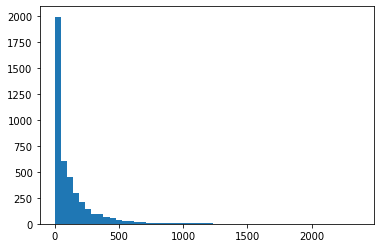

In [5]:
plt.hist(online_retail_df.Description.value_counts(), bins=50)

In [6]:
item_gt_500 = items[ items.values > 230 ].index.tolist()
len(item_gt_500)

709

In [7]:
# total number of invoices
grpby_invoice_f = online_retail_df.groupby("InvoiceNo")
len(grpby_invoice_f.groups)

25481

In [8]:
filtered_df = online_retail_df.groupby("InvoiceNo").filter(lambda i: all(item in item_gt_500 for item in i.Description))

In [9]:
len(filtered_df.Description.unique())

692

In [10]:
len(filtered_df.InvoiceNo.unique())

4233

The original dataframe has 25900 samples, but after choosing only those with items which occur more than 230 times, we have 4233 samples with 692 unique items

In [11]:
filtered_df = filtered_df[['InvoiceNo', 'Description']]
filtered_df

,InvoiceNo,Description
25,536369,BATH BUILDING BLOCK WORD
46,536371,PAPER CHAIN KIT 50'S CHRISTMAS
82,536376,HOT WATER BOTTLE TEA AND SYMPATHY
83,536376,RED HANGING HEART T-LIGHT HOLDER
105,536380,JAM MAKING SET PRINTED
...,...,...
541717,C581569,36 PENCILS TUBE RED RETROSPOT
541751,581572,SET 6 SCHOOL MILK BOTTLES IN CRATE
541752,581572,MINT KITCHEN SCALES
541753,581572,IVORY KITCHEN SCALES


In [12]:
selected_groups = filtered_df.groupby("InvoiceNo")

In [13]:
to_save = selected_groups.apply(lambda a1: a1["Description"].str.cat(sep=", "))
to_save_df = pd.DataFrame({'InvoiceNo': to_save.index, "Description": to_save.values})
to_save_df

,InvoiceNo,Description
0,536369,BATH BUILDING BLOCK WORD
1,536371,PAPER CHAIN KIT 50'S CHRISTMAS
2,536376,"HOT WATER BOTTLE TEA AND SYMPATHY, RED HANGING..."
3,536380,JAM MAKING SET PRINTED
4,536400,HOMEMADE JAM SCENTED CANDLES
...,...,...
4228,C581323,RETROSPOT LARGE MILK JUG
4229,C581463,15CM CHRISTMAS GLASS BALL 20 LIGHTS
4230,C581470,RABBIT NIGHT LIGHT
4231,C581490,"VICTORIAN GLASS HANGING T-LIGHT, ZINC T-LIGHT ..."


To test if there is any lurking variables:

In [21]:
print(*[item for item in filtered_df.Description if item.index(" ") == -1 ])

In [22]:
to_save_df.to_csv("datasets/PROCESSED/household.csv", index=False)